## Reading and Visualizing Processed Data

### Configuration

#### Import Python Modules

In [1]:
import collections
import datetime
from google.cloud import storage
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import numpy as np
import os
import pandas as pd
from PIL import Image
import requests
import tempfile
from tensorflow.keras.preprocessing.image import load_img
import time
from skimage.transform import resize
import tqdm

#### Import Project Modules

In [2]:
import src.config_data_processing as cdp
import src.image_manipulation as imm
import src.misc_functions as mf

### Read Countertop Data from Google Cloud Storage Bucket

In [3]:
use_class = 'Countertop'
image_retriever = imm.OpenCVImageClassRetriever(class_name = use_class)
img_arr = image_retriever.get_class_image_array()
bbox_df = image_retriever.get_bounding_box_df()
desc_df = image_retriever.get_class_desc_df()

### Plot a Single Image with its Bounding Box(es)

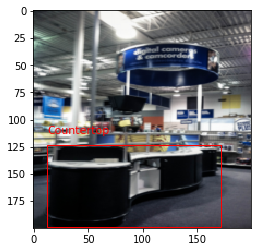

In [4]:
img_num = 100
img_id = desc_df['ImageID'][img_num]
arr = img_arr[img_num]
bbox_coords = bbox_df[bbox_df.ImageID == img_id]

imm.plot_image_bounding_box(img_arr = arr,
                            xmin = list(bbox_coords['XMin']),
                            xmax = list(bbox_coords['XMax']),
                            ymin = list(bbox_coords['YMin']),
                            ymax = list(bbox_coords['YMax']),
                            label = [use_class] * bbox_coords.shape[0])

### Plot a Few Images with Their Bounding Box(es)

<Figure size 432x288 with 0 Axes>

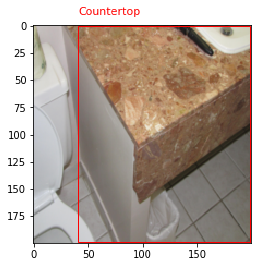

<Figure size 432x288 with 0 Axes>

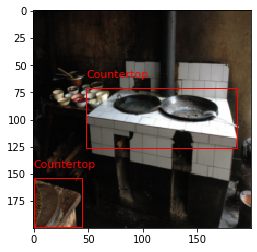

<Figure size 432x288 with 0 Axes>

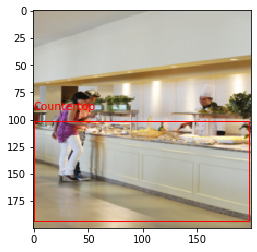

<Figure size 432x288 with 0 Axes>

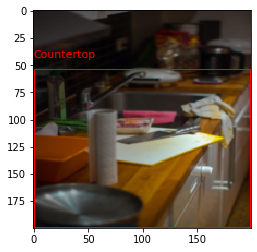

<Figure size 432x288 with 0 Axes>

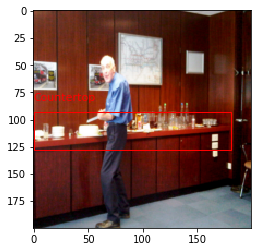

In [5]:
img_nums = [50, 75, 200, 210, 326]
for inum in img_nums:
    img_id = desc_df['ImageID'][inum]
    arr = img_arr[inum]
    bbox_coords = bbox_df[bbox_df.ImageID == img_id]
    plt.figure()
    imm.plot_image_bounding_box(img_arr = arr,
                                xmin = list(bbox_coords['XMin']),
                                xmax = list(bbox_coords['XMax']),
                                ymin = list(bbox_coords['YMin']),
                                ymax = list(bbox_coords['YMax']),
                                label = [use_class] * bbox_coords.shape[0])
    plt.show()